In [1]:
import sys
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#The path of the databases
GDB13_FILE_PATH = '/mnt/2tb/chem/GDB13.db'

In [3]:
def db_connect(db_file_path: str = GDB13_FILE_PATH):
    try:
        print("Connecting to db...")
        con = sqlite3.connect(db_file_path)
        cur = con.cursor()
    except:
        print(f"Error opening {db_file_path} file.")
        sys.exit(1)

    return con, cur  

In [4]:
con, cur = db_connect()

Connecting to db...


In [5]:
import numpy as np
def maccs_similarity(fing1, fing2):

    maccs1 = np.fromiter(fing1, dtype=int)
    maccs2 = np.fromiter(fing2, dtype=int)

    intersection = np.sum(np.bitwise_and(maccs1, maccs2))
    similarity = intersection / (
        np.sum(maccs1) + np.sum(maccs2) - intersection
    )
    return np.round(similarity, decimals=4)

In [6]:
cur.execute("SELECT drug_sim, poison_sim FROM GDB13 WHERE rowid>1 AND rowid<100000000")
row = cur.fetchall()

In [7]:
drug_sim=(list(zip(*row)))[0]
poison_sim=(list(zip(*row)))[1]

In [8]:
drug_sim = []
poison_sim = []

In [ ]:
for id in range(100000000,200000000):
    cur.execute(f"SELECT drug_sim, poison_sim FROM GDB13 WHERE rowid = {id}")
    row = cur.fetchone()
    while row==None:
        id +=1
        cur.execute(f"SELECT drug_sim, poison_sim FROM GDB13 WHERE rowid = {id}")
        row = cur.fetchone()
    drug_sim.append(row[0])
    poison_sim.append(row[1])

In [8]:
len(drug_sim)
len(poison_sim)

100000000

### Drug similarity density graph

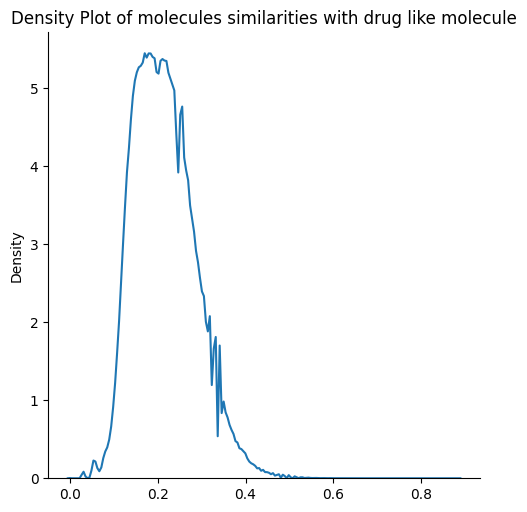

In [13]:
sns.displot(drug_sim, kind="kde")
plt.title('Density Plot of molecules similarities with drug like molecule')
plt.show()   

### Poison similarity graph

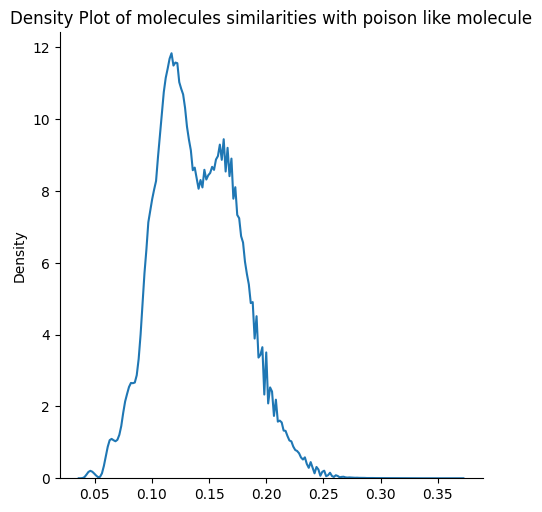

In [19]:
sns.displot(poison_sim, kind="kde")
plt.title('Density Plot of molecules similarities with poison like molecule')
plt.show()

### The difference distribution

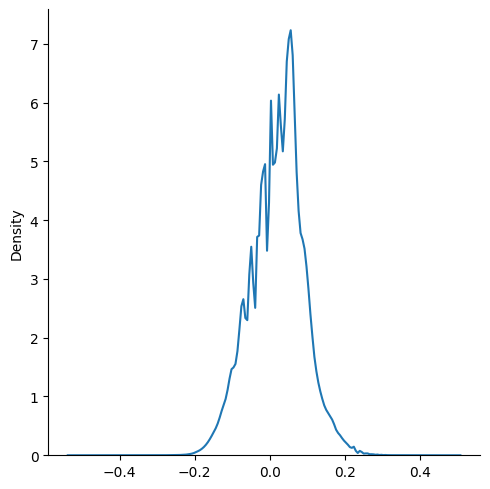

In [14]:
diff = [x - y for x, y in zip(drug_sim, poison_sim)]
sns.displot(diff, kind="kde")
plt.show()

### Scatter PLot

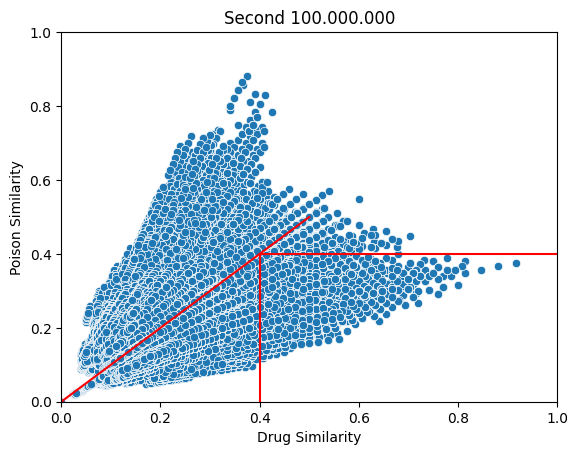

In [9]:
sns.scatterplot(x=drug_sim, y=poison_sim)
plt.plot([0.4, 1], [0.4, 0.4], 'r-') 
plt.plot([0.4, 0.4], [0, 0.4], 'r-') 
plt.plot([0,0.5],[0,0.5], 'r-')

plt.xlim(0, 1)  # Set x-axis limits from 0 to 6
plt.ylim(0, 1)

plt.xlabel('Drug Similarity')
plt.ylabel('Poison Similarity')
plt.title('Second 100.000.000')
plt.show()

In [ ]:
con.close()